In [26]:
pip install scipy

   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   - -------------------------------------- 2.1/44.5 MB 16.8 MB/s eta 0:00:03
   ------- -------------------------------- 8.4/44.5 MB 24.8 MB/s eta 0:00:02
   -------------- ------------------------- 15.7/44.5 MB 29.1 MB/s eta 0:00:01
   --------------------- ------------------ 24.1/44.5 MB 32.5 MB/s eta 0:00:01
   ---------------------------- ----------- 32.0/44.5 MB 34.4 MB/s eta 0:00:01
   -------------------------------- ------- 36.7/44.5 MB 31.9 MB/s eta 0:00:01
   -------------------------------------- - 43.3/44.5 MB 32.0 MB/s eta 0:00:01
   ---------------------------------------- 44.5/44.5 MB 30.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import statistics as st
import pandas as pd 

In [22]:
tcb_data = pd.read_csv('financial_data_TCB.csv')
mbb_data= pd.read_csv('financial_data_MBB.csv')
vcb_data=pd.read_csv('financial_data_VCB.csv')
bid_data=pd.read_csv('financial_data_BID.csv')
gdp_data=pd.read_csv('gdp_vietnam.csv')




In [9]:
df_gdp['GDP'] = pd.to_numeric(df_gdp['GDP'], errors='coerce')


In [15]:
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
gdp_data.rename(columns={'GDP (VND Billion)': 'GDP_VND'}, inplace=True)

In [19]:
gdp_data['date'] = pd.to_datetime(gdp_data['date'])

# Step 2: Rename 'GDP (VND Billion)' column for easier reference
gdp_data.rename(columns={'GDP (VND Billion)': 'GDP_VND'}, inplace=True)

# Step 3: Split annual GDP into quarterly values by dividing by 4
gdp_data['Q1'] = gdp_data['GDP_VND'] / 4
gdp_data['Q2'] = gdp_data['GDP_VND'] / 4
gdp_data['Q3'] = gdp_data['GDP_VND'] / 4
gdp_data['Q4'] = gdp_data['GDP_VND'] / 4

# Step 4: Reshape the data into long format, with each quarter's GDP as a separate row
gdp_quarterly = gdp_data.melt(id_vars=["date"], value_vars=["Q1", "Q2", "Q3", "Q4"],
                              var_name="Quarter", value_name="Quarterly_GDP")

# Step 5: Map each quarter to the appropriate date
quarter_map = {'Q1': '03-31', 'Q2': '06-30', 'Q3': '09-30', 'Q4': '12-31'}
gdp_quarterly['Date'] = pd.to_datetime(gdp_quarterly['date'].dt.year.astype(str) + '-' + gdp_quarterly['Quarter'].map(quarter_map))

# Step 6: Select only the Date and Quarterly_GDP columns for the final output
gdp_quarterly = gdp_quarterly[['Date', 'Quarterly_GDP']]

# Display the result
print(gdp_quarterly)

         Date  Quarterly_GDP
0  2023-03-31   2.524587e+06
1  2022-03-31   2.410654e+06
2  2021-03-31   2.153039e+06
3  2020-03-31   2.036367e+06
4  2019-03-31   1.964396e+06
..        ...            ...
91 2004-12-31   2.668886e+05
92 2003-12-31   2.323710e+05
93 2002-12-31   2.060016e+05
94 2001-12-31   1.920255e+05
95 2000-12-31   1.831385e+05

[96 rows x 2 columns]


In [23]:
# Inspect column names in each bank dataset to identify if there's any inconsistency with the 'Date' column
bid_data_columns = bid_data.columns
mbb_data_columns = mbb_data.columns
tcb_data_columns = tcb_data.columns
vcb_data_columns = vcb_data.columns

bid_data_columns, mbb_data_columns, tcb_data_columns, vcb_data_columns


(Index(['Quarter-Year', 'quarter', 'year', 'roe', 'roa', 'bookValuePerShare',
        'interestMargin', 'badDebtPercentage', 'provisionOnBadDebt',
        'equityOnTotalAsset', 'equityOnLoan', 'assetOnEquity', 'postTaxOnToi',
        'loanOnEarnAsset', 'loanOnAsset', 'badDebtOnAsset', 'payableOnEquity',
        'cancelDebt', 'bookValuePerShareChange', 'creditGrowth'],
       dtype='object'),
 Index(['Quarter-Year', 'quarter', 'year', 'roe', 'roa', 'bookValuePerShare',
        'interestMargin', 'badDebtPercentage', 'provisionOnBadDebt',
        'equityOnTotalAsset', 'equityOnLoan', 'assetOnEquity', 'postTaxOnToi',
        'loanOnEarnAsset', 'loanOnAsset', 'badDebtOnAsset', 'payableOnEquity',
        'cancelDebt', 'bookValuePerShareChange', 'creditGrowth'],
       dtype='object'),
 Index(['Quarter-Year', 'quarter', 'year', 'roe', 'roa', 'bookValuePerShare',
        'interestMargin', 'badDebtPercentage', 'provisionOnBadDebt',
        'equityOnTotalAsset', 'equityOnLoan', 'assetOnEquity', 

In [27]:
import pandas as pd
from scipy.stats import pearsonr
from datetime import datetime

# Load the GDP data and each bank's financial data
gdp_data = pd.read_csv('gdp_vietnam.csv')
bid_data = pd.read_csv('financial_data_BID.csv')
mbb_data = pd.read_csv('financial_data_MBB.csv')
tcb_data = pd.read_csv('financial_data_TCB.csv')
vcb_data = pd.read_csv('financial_data_VCB.csv')

# Step 1: Convert the 'date' column to datetime format in GDP data
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
gdp_data.rename(columns={'GDP (VND Billion)': 'GDP_VND'}, inplace=True)

# Step 2: Divide annual GDP into quarterly values
gdp_data['Q1'] = gdp_data['GDP_VND'] / 4
gdp_data['Q2'] = gdp_data['GDP_VND'] / 4
gdp_data['Q3'] = gdp_data['GDP_VND'] / 4
gdp_data['Q4'] = gdp_data['GDP_VND'] / 4

# Step 3: Transform to quarterly format
gdp_quarterly = gdp_data.melt(id_vars=["date"], value_vars=["Q1", "Q2", "Q3", "Q4"],
                              var_name="Quarter", value_name="Quarterly_GDP")

# Step 4: Map quarters to end dates
quarter_map = {'Q1': '03-31', 'Q2': '06-30', 'Q3': '09-30', 'Q4': '12-31'}
gdp_quarterly['Date'] = pd.to_datetime(gdp_quarterly['date'].dt.year.astype(str) + '-' + gdp_quarterly['Quarter'].map(quarter_map))
gdp_quarterly = gdp_quarterly[['Date', 'Quarterly_GDP']]
gdp_quarterly = gdp_quarterly.sort_values(by='Date').reset_index(drop=True)

# Prepare each bank's dataset
bank_datasets = {'BID': bid_data, 'MBB': mbb_data, 'TCB': tcb_data, 'VCB': vcb_data}

# Function to create Date column from 'quarter' and 'year'
def convert_to_date(row):
    quarter_end = {'Q1': '03-31', 'Q2': '06-30', 'Q3': '09-30', 'Q4': '12-31'}
    return pd.to_datetime(f"{row['year']}-{quarter_end[row['quarter']]}")

# Add 'Date' column in each bank dataset and calculate Pearson correlation
results = {}

for bank_name, data in bank_datasets.items():
    data['Date'] = data.apply(convert_to_date, axis=1)  # Add Date column

    # Merge with GDP quarterly data
    merged_data = pd.merge_asof(data.sort_values('Date'), gdp_quarterly, on='Date', direction='nearest')
    
    results[bank_name] = {}
    columns_of_interest = ['postTaxOnToi', 'equityOnTotalAsset', 'badDebtPercentage']  # Columns to analyze

    # Calculate Pearson correlation for each indicator with GDP
    for col in columns_of_interest:
        if col in merged_data.columns:
            merged_col_data = merged_data[[col, 'Quarterly_GDP']].dropna()  # Drop NA values
            
            if not merged_col_data.empty:
                correlation, p_value = pearsonr(merged_col_data[col], merged_col_data['Quarterly_GDP'])
                results[bank_name][col] = {'correlation': correlation, 'p_value': p_value}
            else:
                results[bank_name][col] = {'correlation': None, 'p_value': None}

# Display final results
results


{'BID': {'postTaxOnToi': {'correlation': np.float64(0.2402515294600719),
   'p_value': np.float64(0.10381069520396055)},
  'equityOnTotalAsset': {'correlation': np.float64(0.0031281688956832643),
   'p_value': np.float64(0.9833507947518931)},
  'badDebtPercentage': {'correlation': np.float64(-0.7326127309412183),
   'p_value': np.float64(4.806659486020766e-09)}},
 'MBB': {'postTaxOnToi': {'correlation': np.float64(0.6351041596510607),
   'p_value': np.float64(1.625105555157918e-06)},
  'equityOnTotalAsset': {'correlation': np.float64(0.728344485804927),
   'p_value': np.float64(6.528947878178535e-09)},
  'badDebtPercentage': {'correlation': np.float64(-0.4695705431214969),
   'p_value': np.float64(0.0008688123877978522)}},
 'TCB': {'postTaxOnToi': {'correlation': np.float64(0.7890764720752146),
   'p_value': np.float64(1.2025382151486156e-10)},
  'equityOnTotalAsset': {'correlation': np.float64(0.8513116359065226),
   'p_value': np.float64(1.2698799930403256e-13)},
  'badDebtPercentage

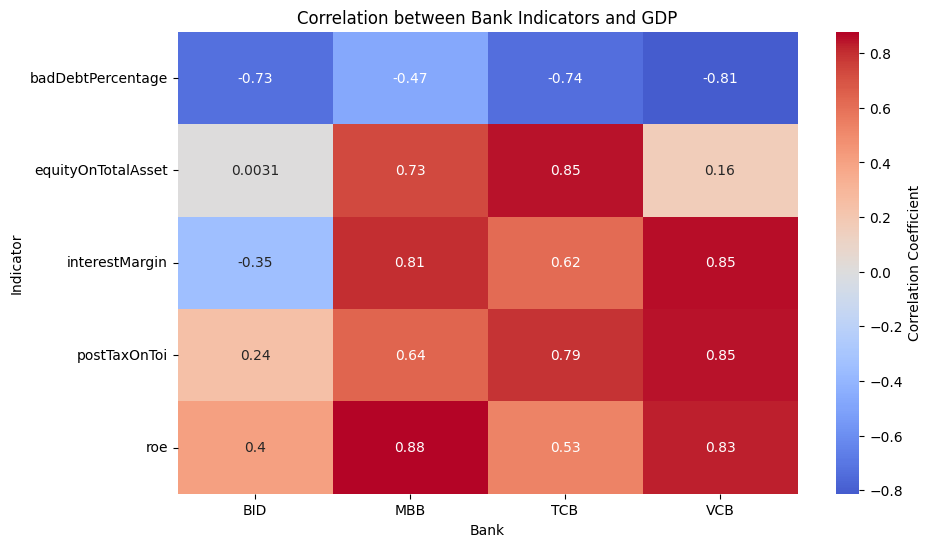

In [3]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the GDP data and each bank's financial data
gdp_data = pd.read_csv('gdp_vietnam.csv')
bid_data = pd.read_csv('financial_data_BID.csv')
mbb_data = pd.read_csv('financial_data_MBB.csv')
tcb_data = pd.read_csv('financial_data_TCB.csv')
vcb_data = pd.read_csv('financial_data_VCB.csv')

# Step 1: Process GDP data to create quarterly values
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
gdp_data.rename(columns={'GDP (VND Billion)': 'GDP_VND'}, inplace=True)
gdp_data['Q1'] = gdp_data['GDP_VND'] / 4
gdp_data['Q2'] = gdp_data['GDP_VND'] / 4
gdp_data['Q3'] = gdp_data['GDP_VND'] / 4
gdp_data['Q4'] = gdp_data['GDP_VND'] / 4

gdp_quarterly = gdp_data.melt(id_vars=["date"], value_vars=["Q1", "Q2", "Q3", "Q4"],
                              var_name="Quarter", value_name="Quarterly_GDP")

quarter_map = {'Q1': '03-31', 'Q2': '06-30', 'Q3': '09-30', 'Q4': '12-31'}
gdp_quarterly['Date'] = pd.to_datetime(gdp_quarterly['date'].dt.year.astype(str) + '-' + gdp_quarterly['Quarter'].map(quarter_map))
gdp_quarterly = gdp_quarterly[['Date', 'Quarterly_GDP']]
gdp_quarterly = gdp_quarterly.sort_values(by='Date').reset_index(drop=True)

# Prepare each bank's dataset
bank_datasets = {'BID': bid_data, 'MBB': mbb_data, 'TCB': tcb_data, 'VCB': vcb_data}

# Function to create Date column from 'quarter' and 'year'
def convert_to_date(row):
    quarter_end = {'Q1': '03-31', 'Q2': '06-30', 'Q3': '09-30', 'Q4': '12-31'}
    return pd.to_datetime(f"{row['year']}-{quarter_end[row['quarter']]}")

# Initialize results dictionary for storing correlation values
results = {}
correlation_data = []

for bank_name, data in bank_datasets.items():
    data['Date'] = data.apply(convert_to_date, axis=1)  # Add Date column
    merged_data = pd.merge_asof(data.sort_values('Date'), gdp_quarterly, on='Date', direction='nearest')
    results[bank_name] = {}
    
    columns_of_interest = ['postTaxOnToi', 'equityOnTotalAsset', 'badDebtPercentage', 
                       'Total_Assets', 'interestMargin','roe']  # Add as many as needed # Example columns

    # Calculate Pearson correlation for each column with GDP
    for col in columns_of_interest:
        if col in merged_data.columns:
            merged_col_data = merged_data[[col, 'Quarterly_GDP']].dropna()
            
            if not merged_col_data.empty:
                correlation, p_value = pearsonr(merged_col_data[col], merged_col_data['Quarterly_GDP'])
                results[bank_name][col] = {'correlation': correlation, 'p_value': p_value}
                
                # Append data for heatmap visualization
                correlation_data.append([bank_name, col, correlation])
            else:
                results[bank_name][col] = {'correlation': None, 'p_value': None}

# Convert correlation data to a DataFrame for visualization
correlation_df = pd.DataFrame(correlation_data, columns=['Bank', 'Indicator', 'Correlation'])

# Correct pivot syntax for heatmap format
correlation_pivot = correlation_df.pivot(index="Indicator", columns="Bank", values="Correlation")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_pivot, annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation between Bank Indicators and GDP')
plt.show()


In [33]:
pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.8 MB 12.0 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 24.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Nov, 2024
Time:                     14:02:31
--------------------------------------------------------------------
No. of Equations:         13.0000    BIC:                   -102.351
Nobs:                     95.0000    HQIC:                  -105.267
Log likelihood:           3523.71    FPE:                2.73308e-47
AIC:                     -107.244    Det(Omega_mle):     4.57630e-48
--------------------------------------------------------------------
Results for equation Quarterly_GDP
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                        396830.735138    209649.596651            1.893           0.058
L1.Quarterly_GDP                  1.011032         0.017871           56.575           0.000
L1.p

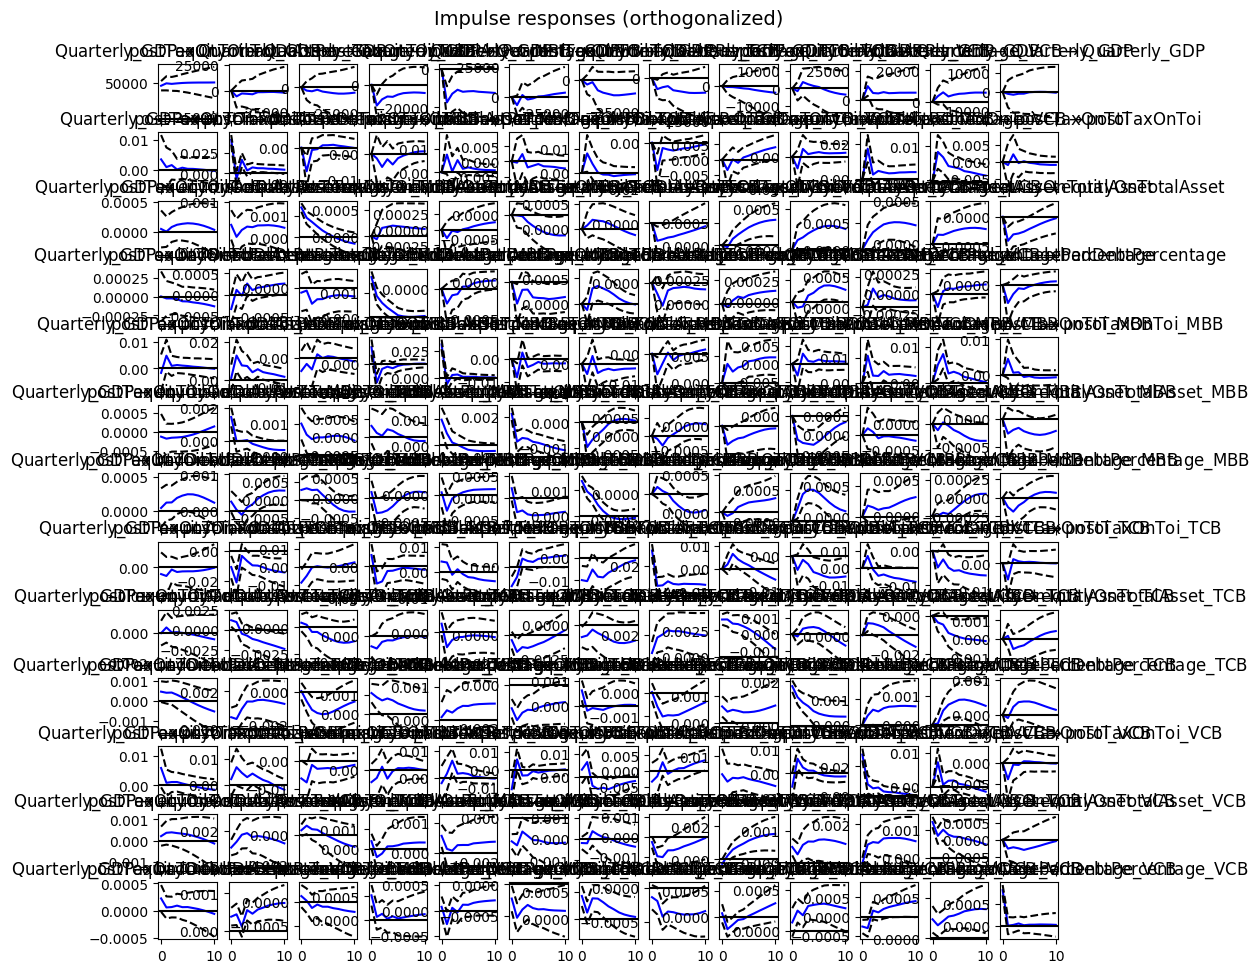

In [34]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Load and preprocess the GDP and bank data as before
# Assuming GDP data is preprocessed into `gdp_quarterly` and bank datasets are in `bank_datasets`

# Merge each bank's data with GDP data on Date, keeping relevant columns
all_data = gdp_quarterly[['Date', 'Quarterly_GDP']].copy()

# Add desired indicators from each bank to the data
for bank_name, data in bank_datasets.items():
    data['Date'] = data.apply(convert_to_date, axis=1)  # Ensure Date column is present
    merged_data = pd.merge_asof(data.sort_values('Date'), gdp_quarterly, on='Date', direction='nearest')
    
    # Select only the necessary columns for correlation analysis
    all_data = pd.merge_asof(all_data, merged_data[['Date', 'postTaxOnToi', 'equityOnTotalAsset', 'badDebtPercentage']],
                             on='Date', direction='nearest', suffixes=('', f'_{bank_name}'))

# Drop rows with any missing values to ensure a clean dataset for VAR
all_data = all_data.dropna()

# Fit the VAR model on all_data (ensuring it's sorted by Date)
model = VAR(all_data.drop(columns=['Date']).astype(float))  # Exclude Date column, ensure numerical types
fitted_model = model.fit()

# Print model summary to understand interdependencies
print(fitted_model.summary())

# Plot the impulse response to visualize the impact of each variable on others
irf = fitted_model.irf(10)  # 10 periods ahead
irf.plot(orth=True)
plt.show()

TypeError: BaseIRAnalysis.plot() got an unexpected keyword argument 'fig'

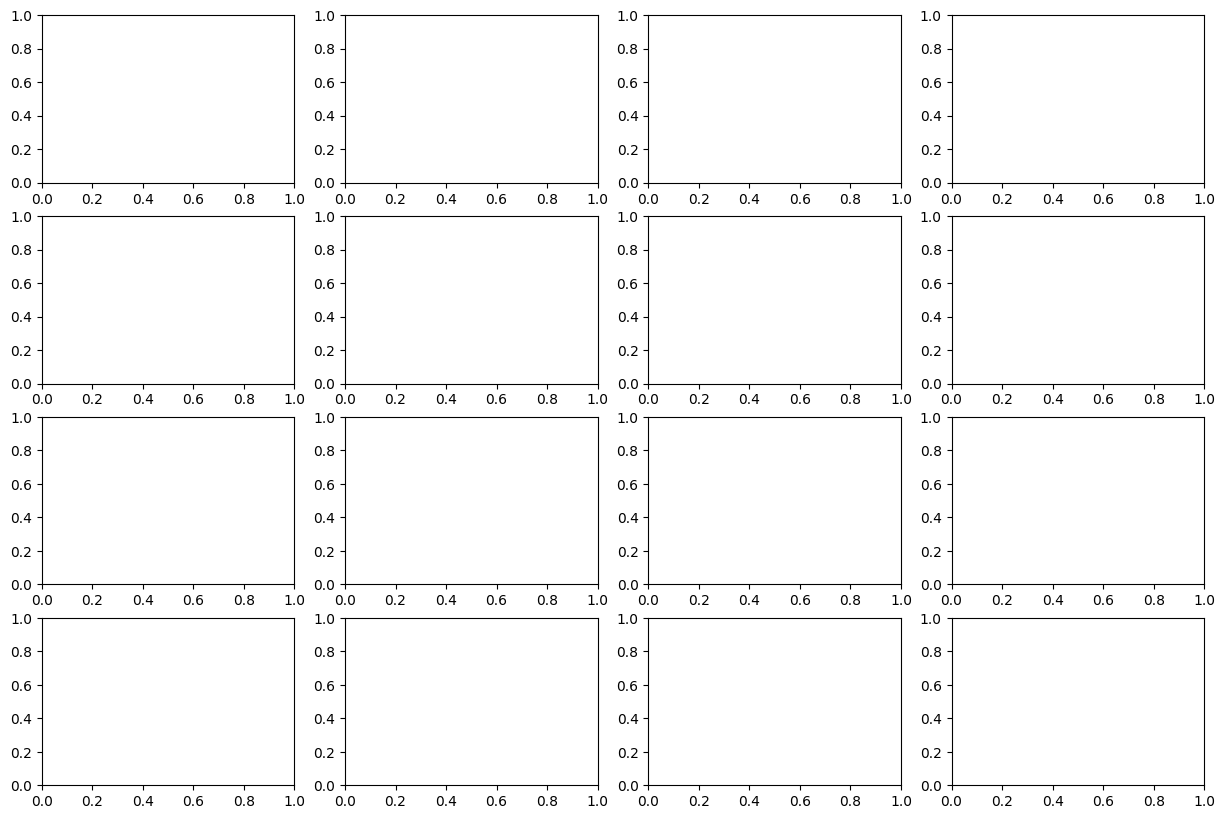

In [35]:
# Increase the figure size for better readability
import matplotlib.pyplot as plt

# Choose the number of steps (periods) for impulse responses and which variables to focus on
num_periods = 10  # e.g., 10 periods ahead
variables_to_plot = ['Quarterly_GDP', 'postTaxOnToi', 'equityOnTotalAsset', 'badDebtPercentage']  # Select relevant variables

# Filter the impulse response function to only display specified variables
irf = fitted_model.irf(num_periods)
fig, axes = plt.subplots(len(variables_to_plot), len(variables_to_plot), figsize=(15, 10))

# Plot impulse responses for the selected variables
irf.plot(orth=True, impulse=variables_to_plot, response=variables_to_plot, fig=fig)

plt.tight_layout()
plt.show()


In [37]:
# Print out the names of variables in the fitted model to verify
print("Variables in VAR model:", fitted_model.names)


Variables in VAR model: ['Quarterly_GDP', 'postTaxOnToi', 'equityOnTotalAsset', 'badDebtPercentage', 'postTaxOnToi_MBB', 'equityOnTotalAsset_MBB', 'badDebtPercentage_MBB', 'postTaxOnToi_TCB', 'equityOnTotalAsset_TCB', 'badDebtPercentage_TCB', 'postTaxOnToi_VCB', 'equityOnTotalAsset_VCB', 'badDebtPercentage_VCB']


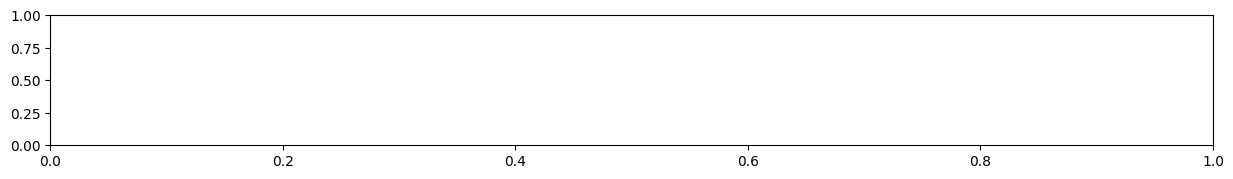

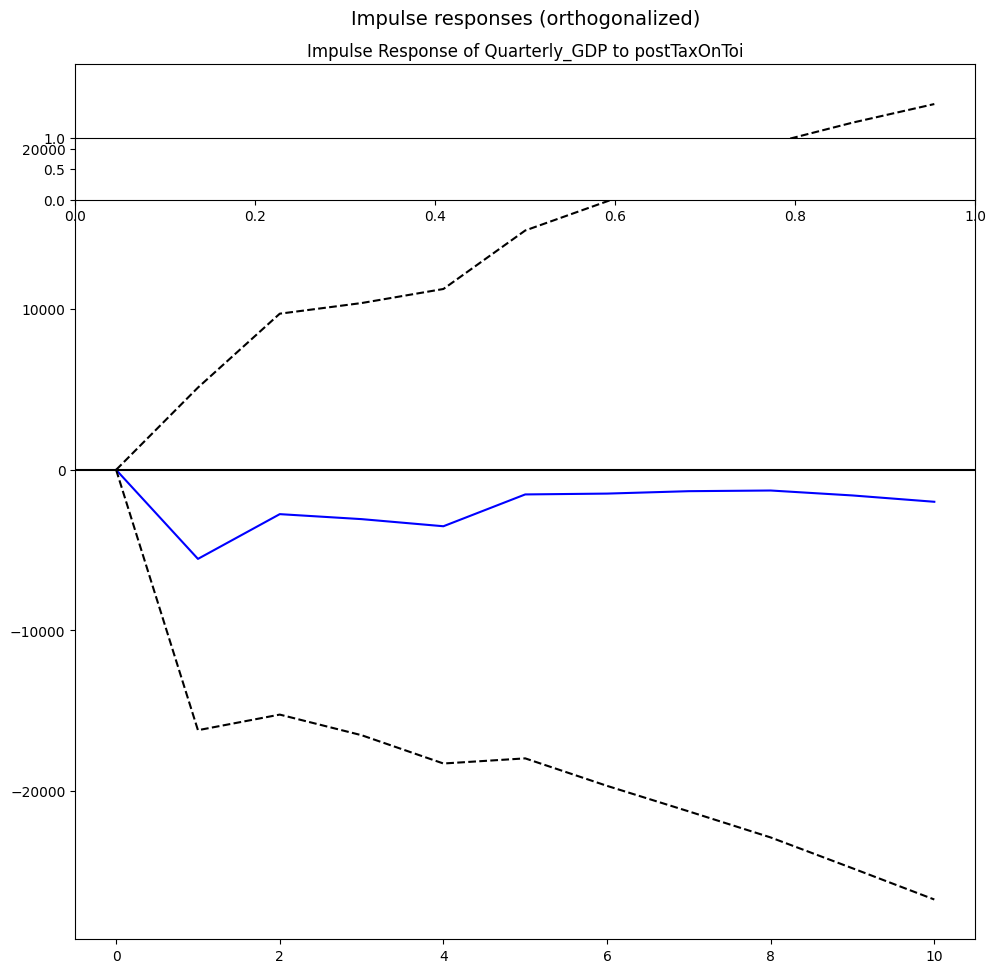

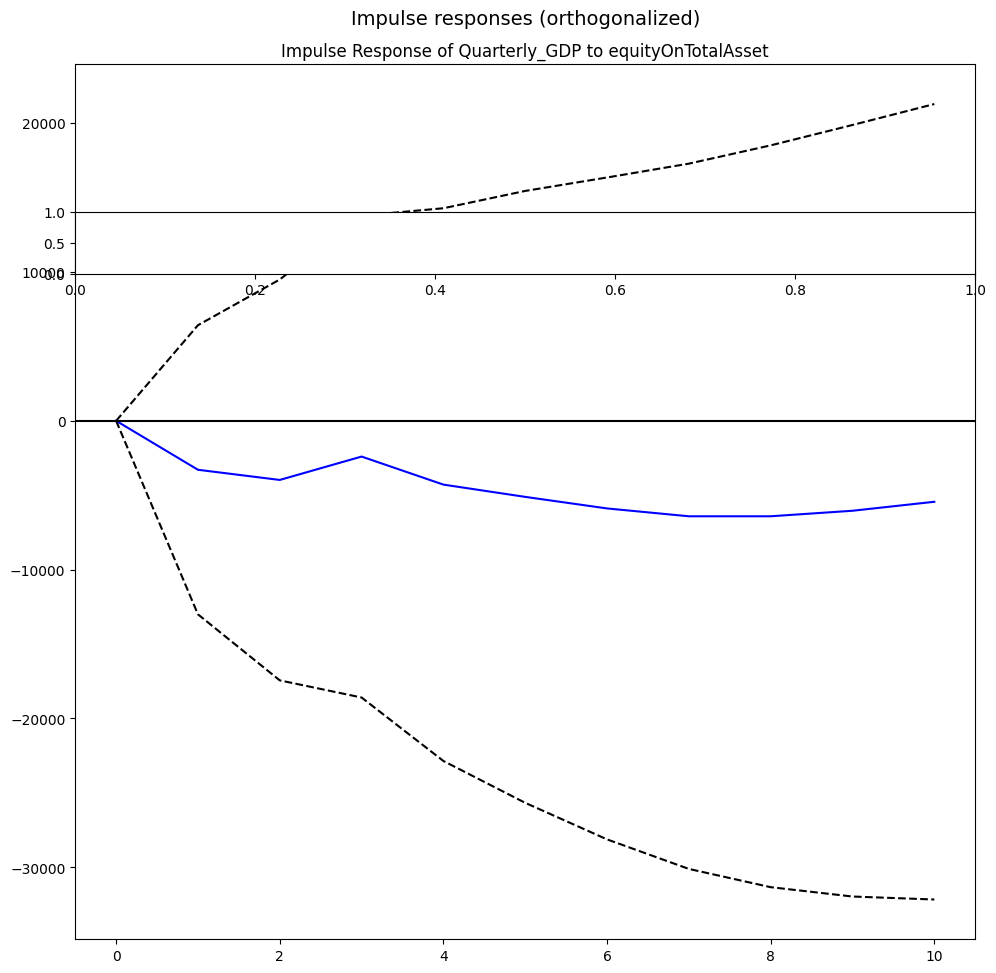

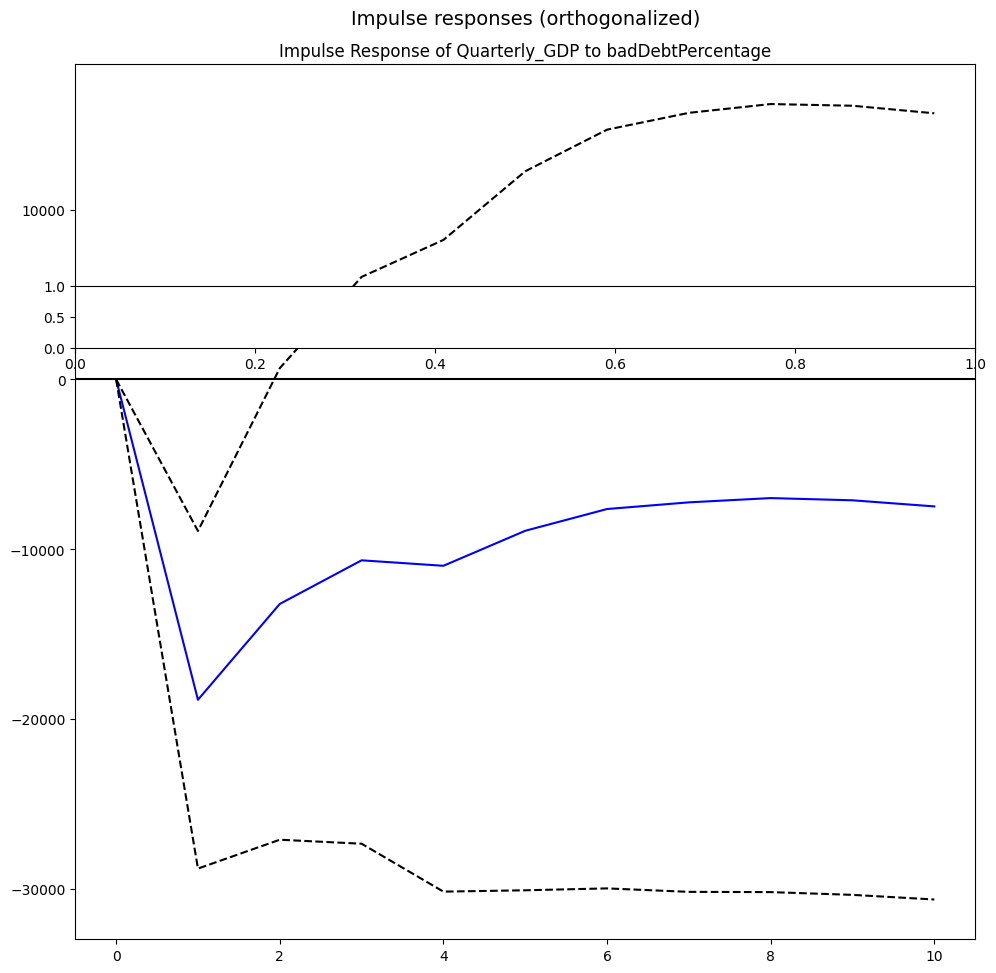

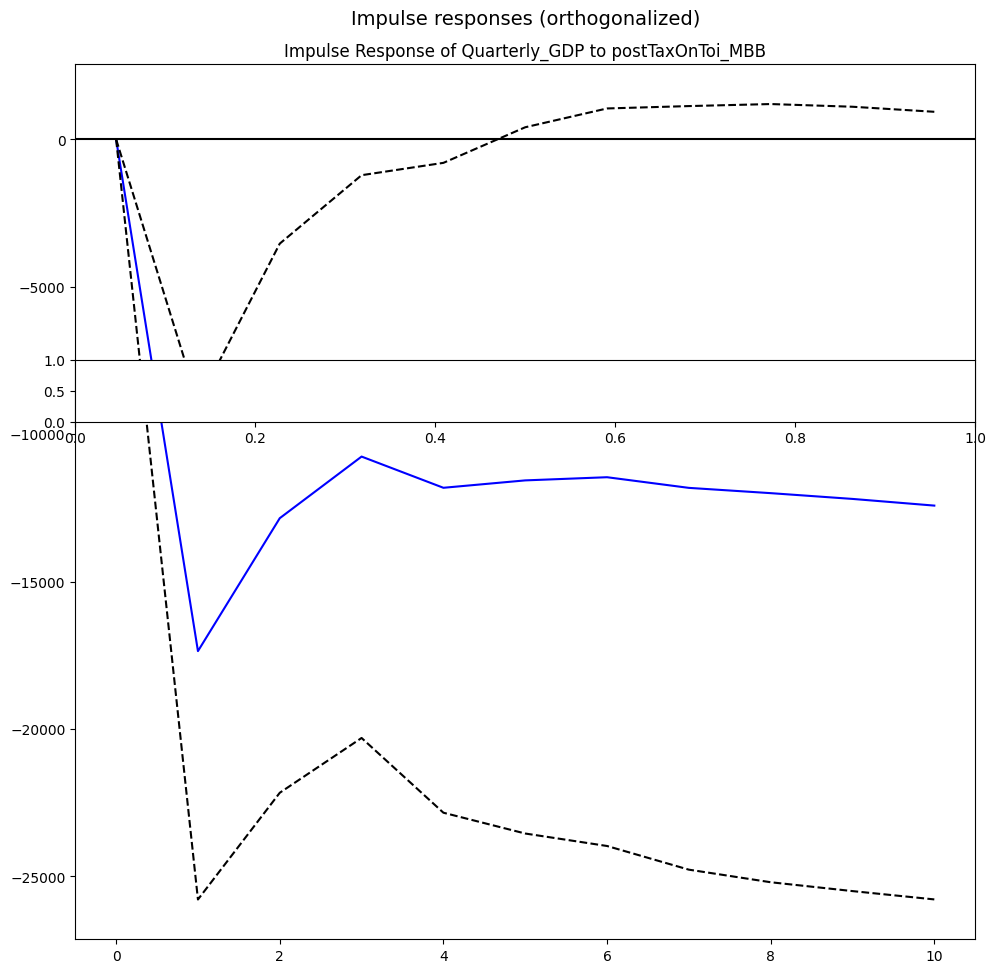

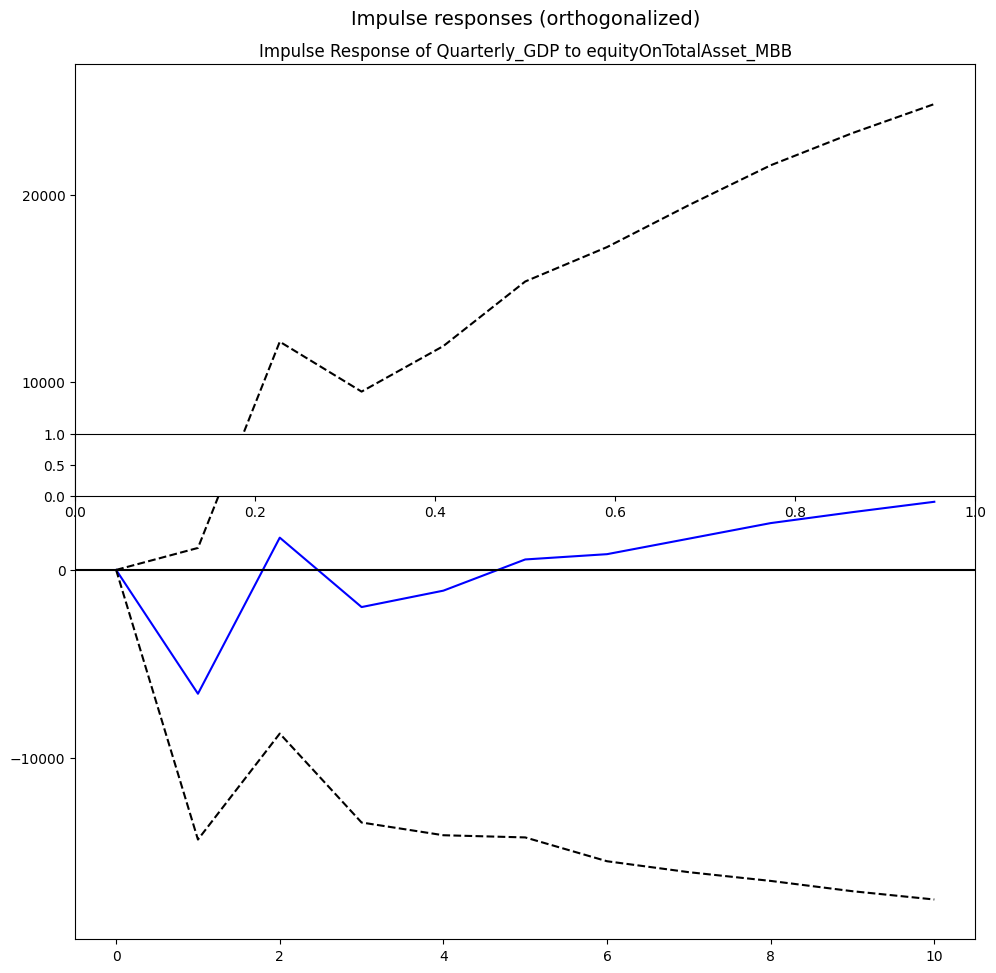

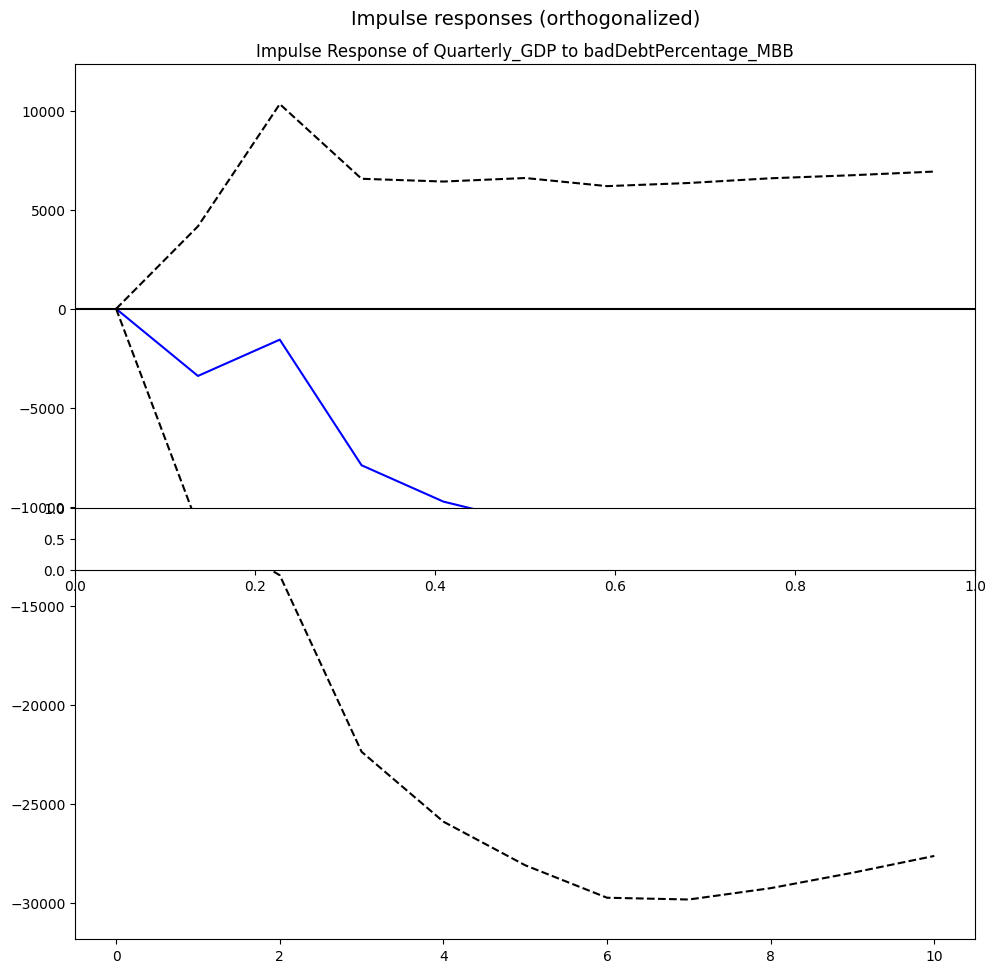

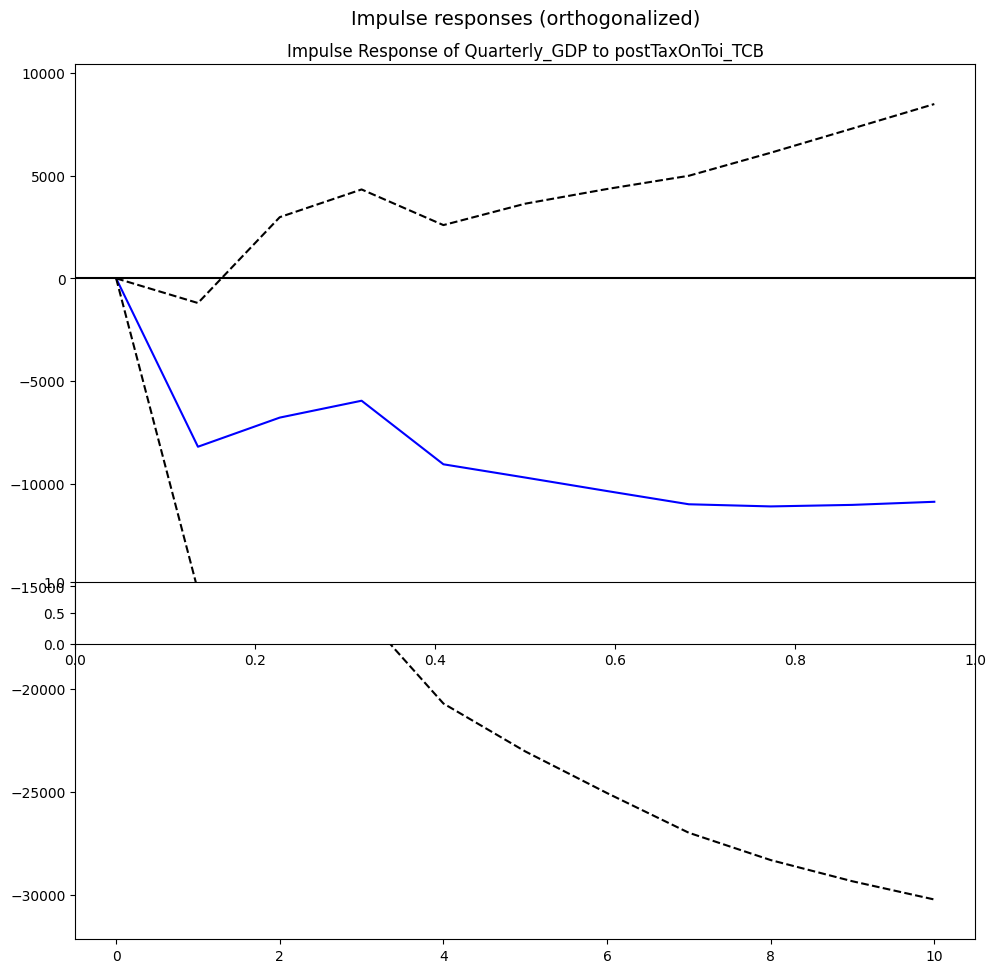

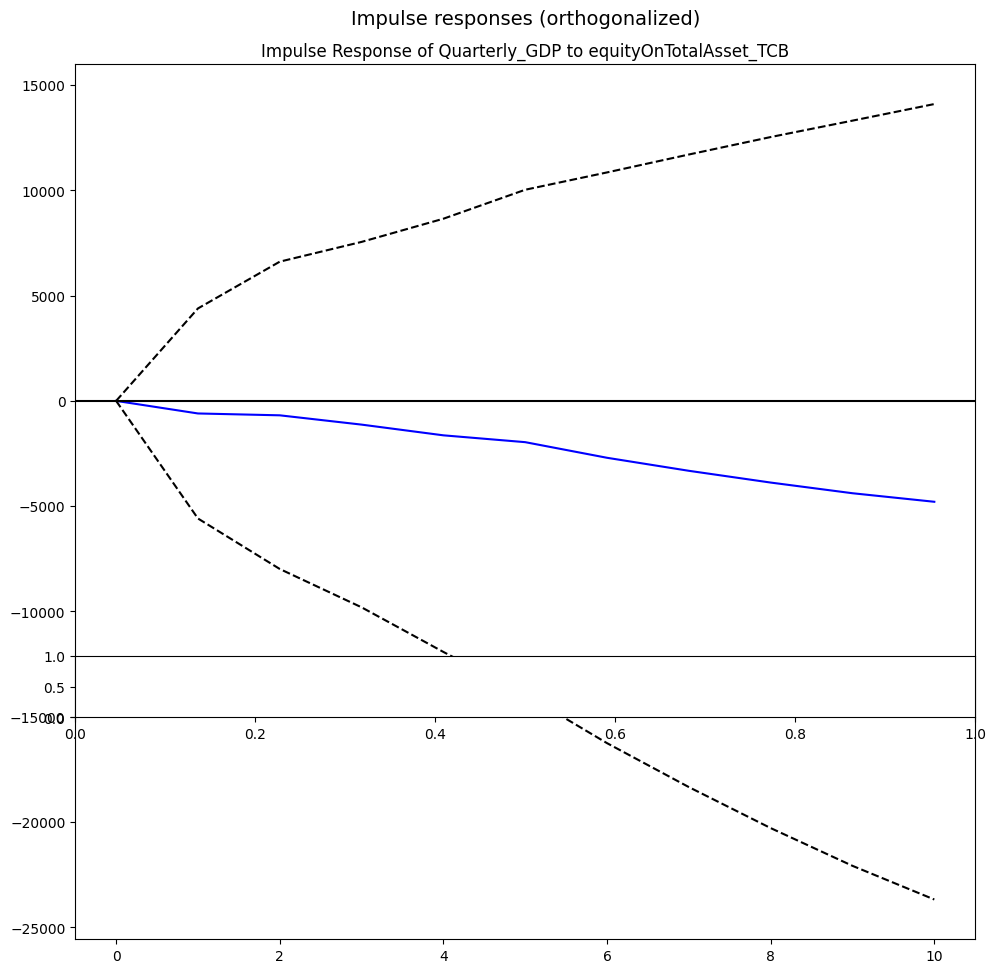

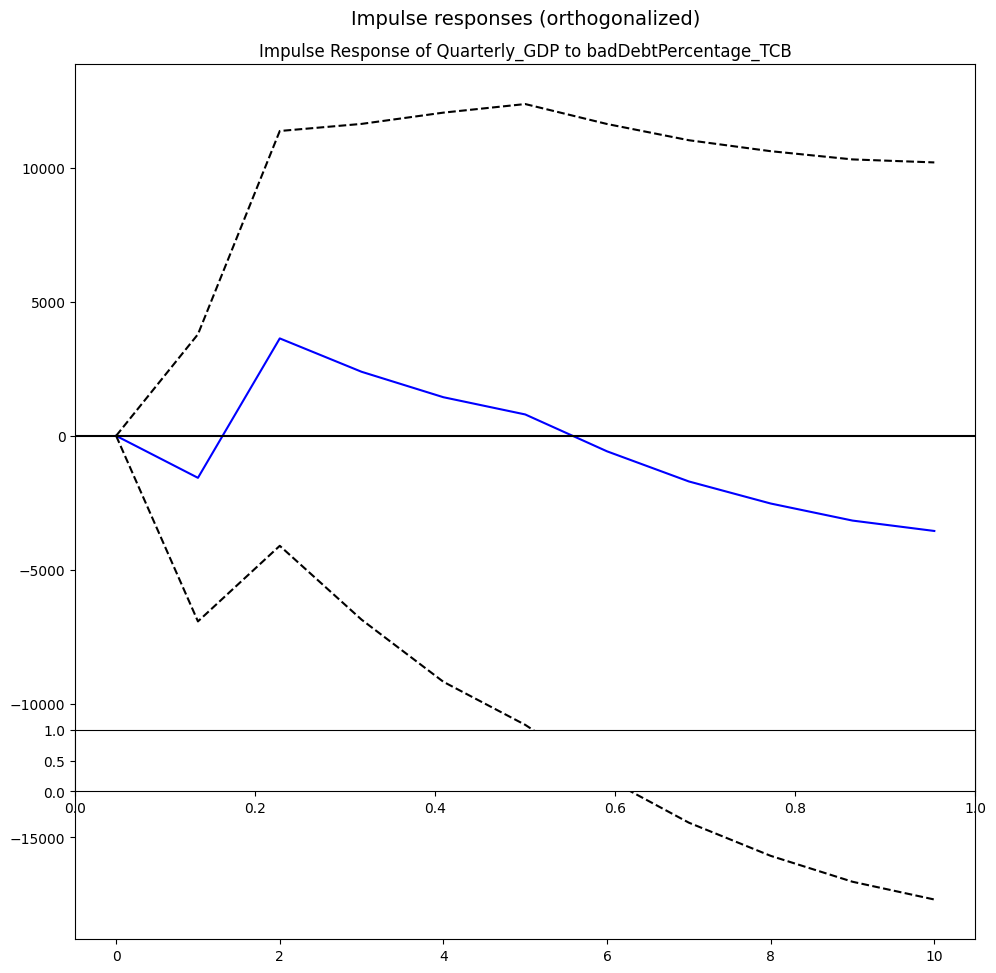

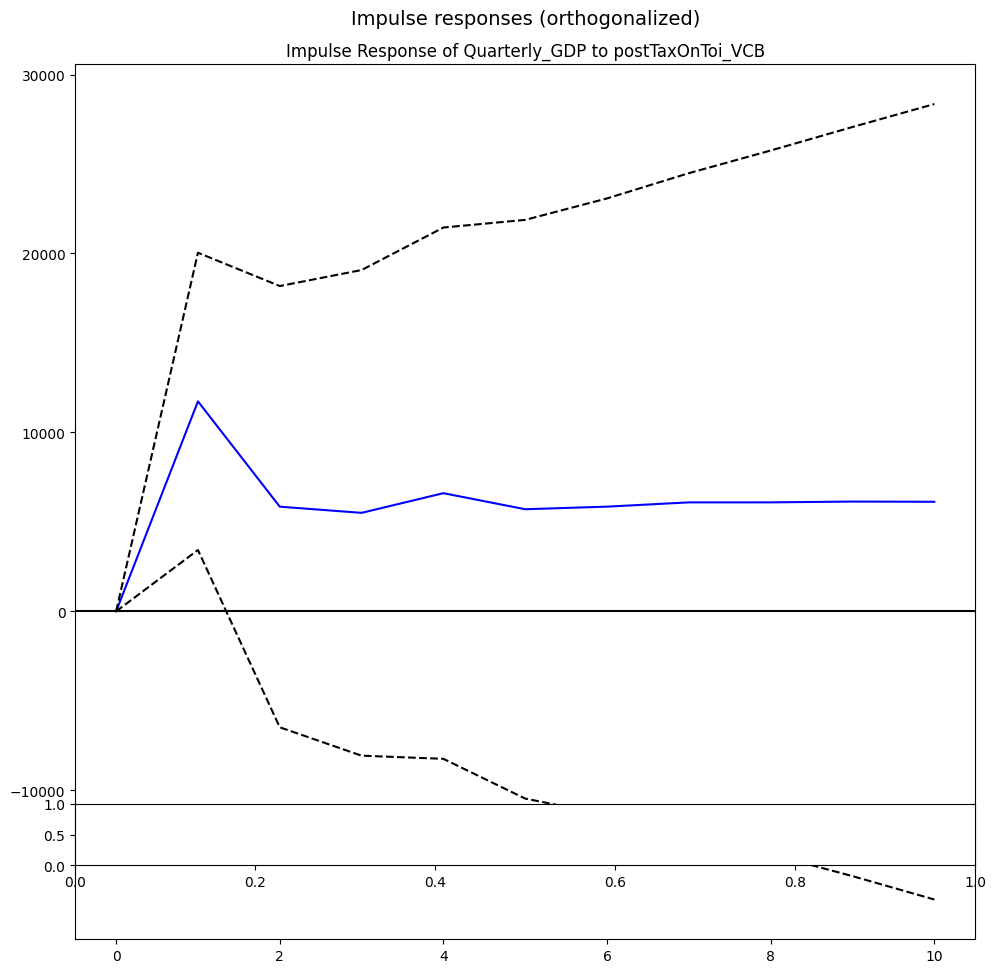

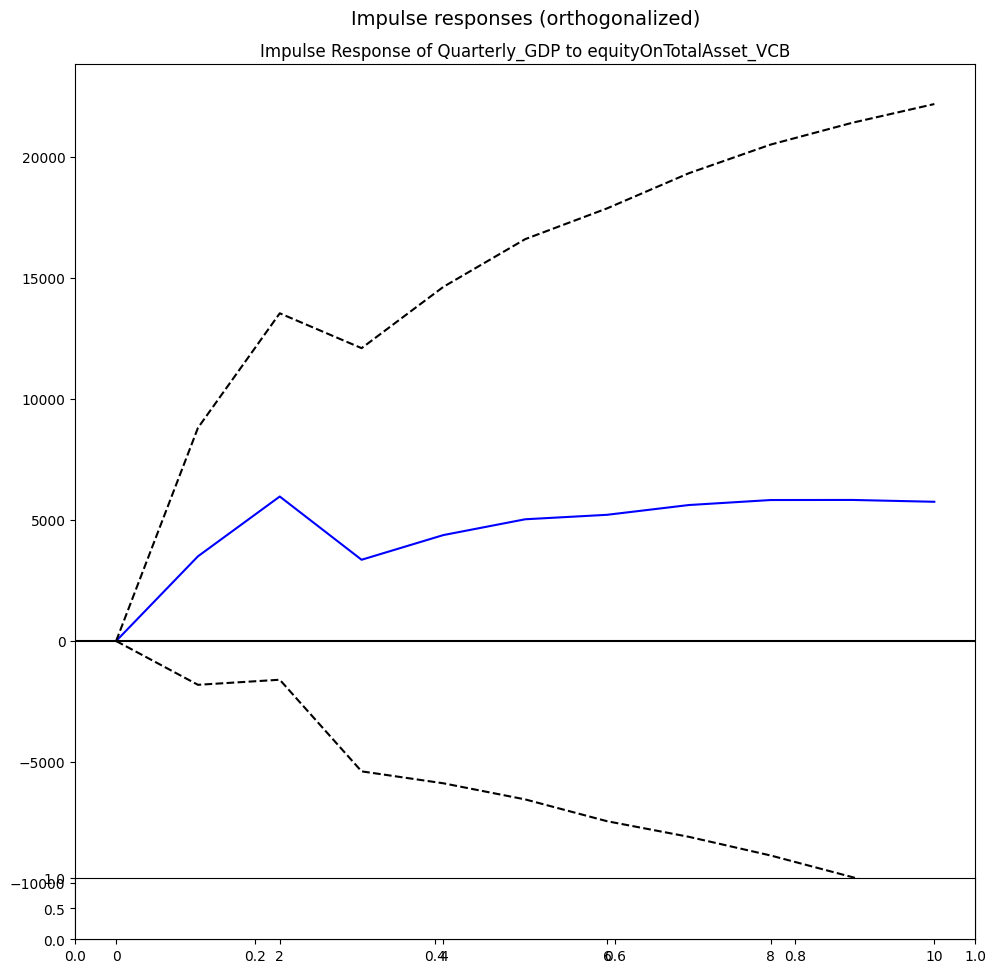

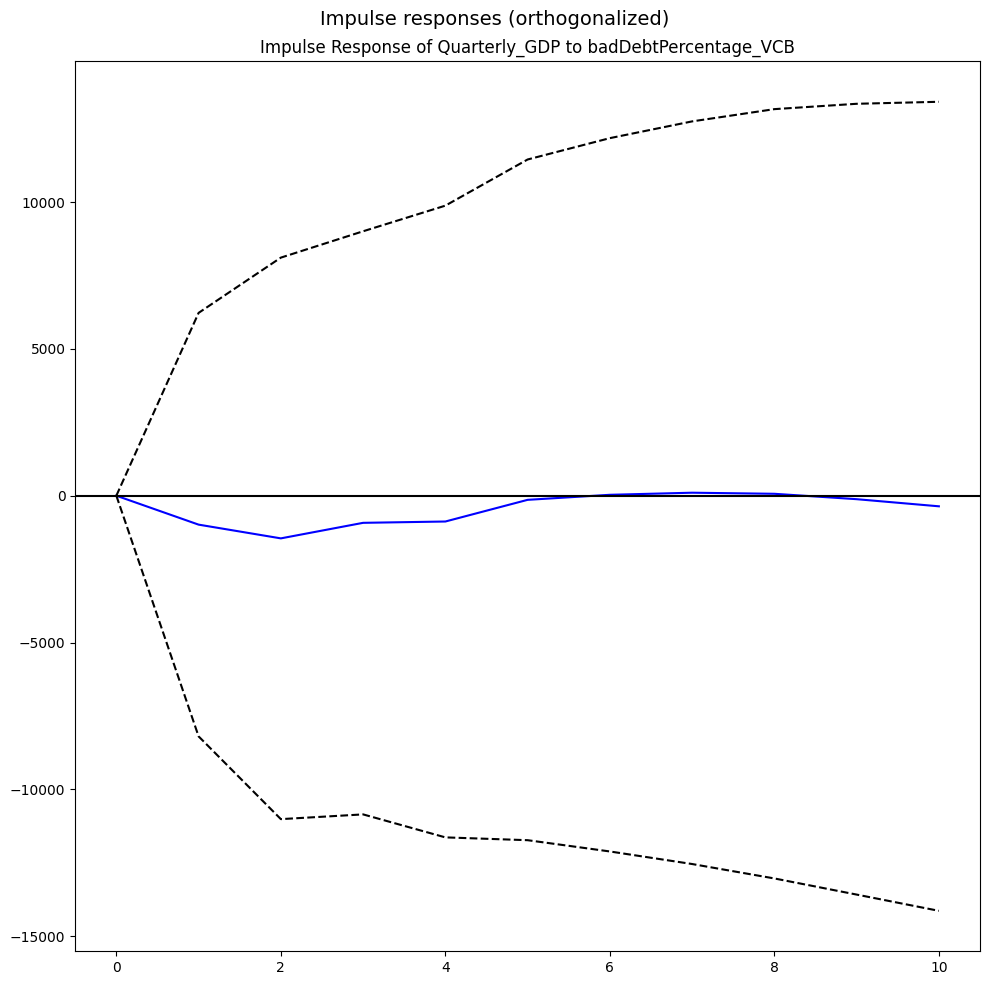

In [39]:
import matplotlib.pyplot as plt

# Define the number of steps and specific variables to focus on
num_periods = 10
impulse_vars = [
    'postTaxOnToi', 'equityOnTotalAsset', 'badDebtPercentage',
    'postTaxOnToi_MBB', 'equityOnTotalAsset_MBB', 'badDebtPercentage_MBB',
    'postTaxOnToi_TCB', 'equityOnTotalAsset_TCB', 'badDebtPercentage_TCB',
    'postTaxOnToi_VCB', 'equityOnTotalAsset_VCB', 'badDebtPercentage_VCB'
]

response_var = 'Quarterly_GDP'  # Set GDP as the main response variable

# Generate impulse response function
irf = fitted_model.irf(num_periods)

# Increase figure size for readability
plt.figure(figsize=(15, len(impulse_vars) * 2))

# Plot impulse responses for each impulse variable affecting GDP
for i, impulse in enumerate(impulse_vars, 1):
    plt.subplot(len(impulse_vars), 1, i)
    irf.plot(orth=True, impulse=impulse, response=response_var)
    plt.title(f"Impulse Response of {response_var} to {impulse}")

plt.tight_layout()
plt.show()



C:\Users\Vinh\AppData\Local\Temp\ipykernel_29140\89361899.py:31: RuntimeWarning: invalid value encountered in sqrt
  irf_stderr = np.sqrt(variances)  # Take the square root to get standard errors


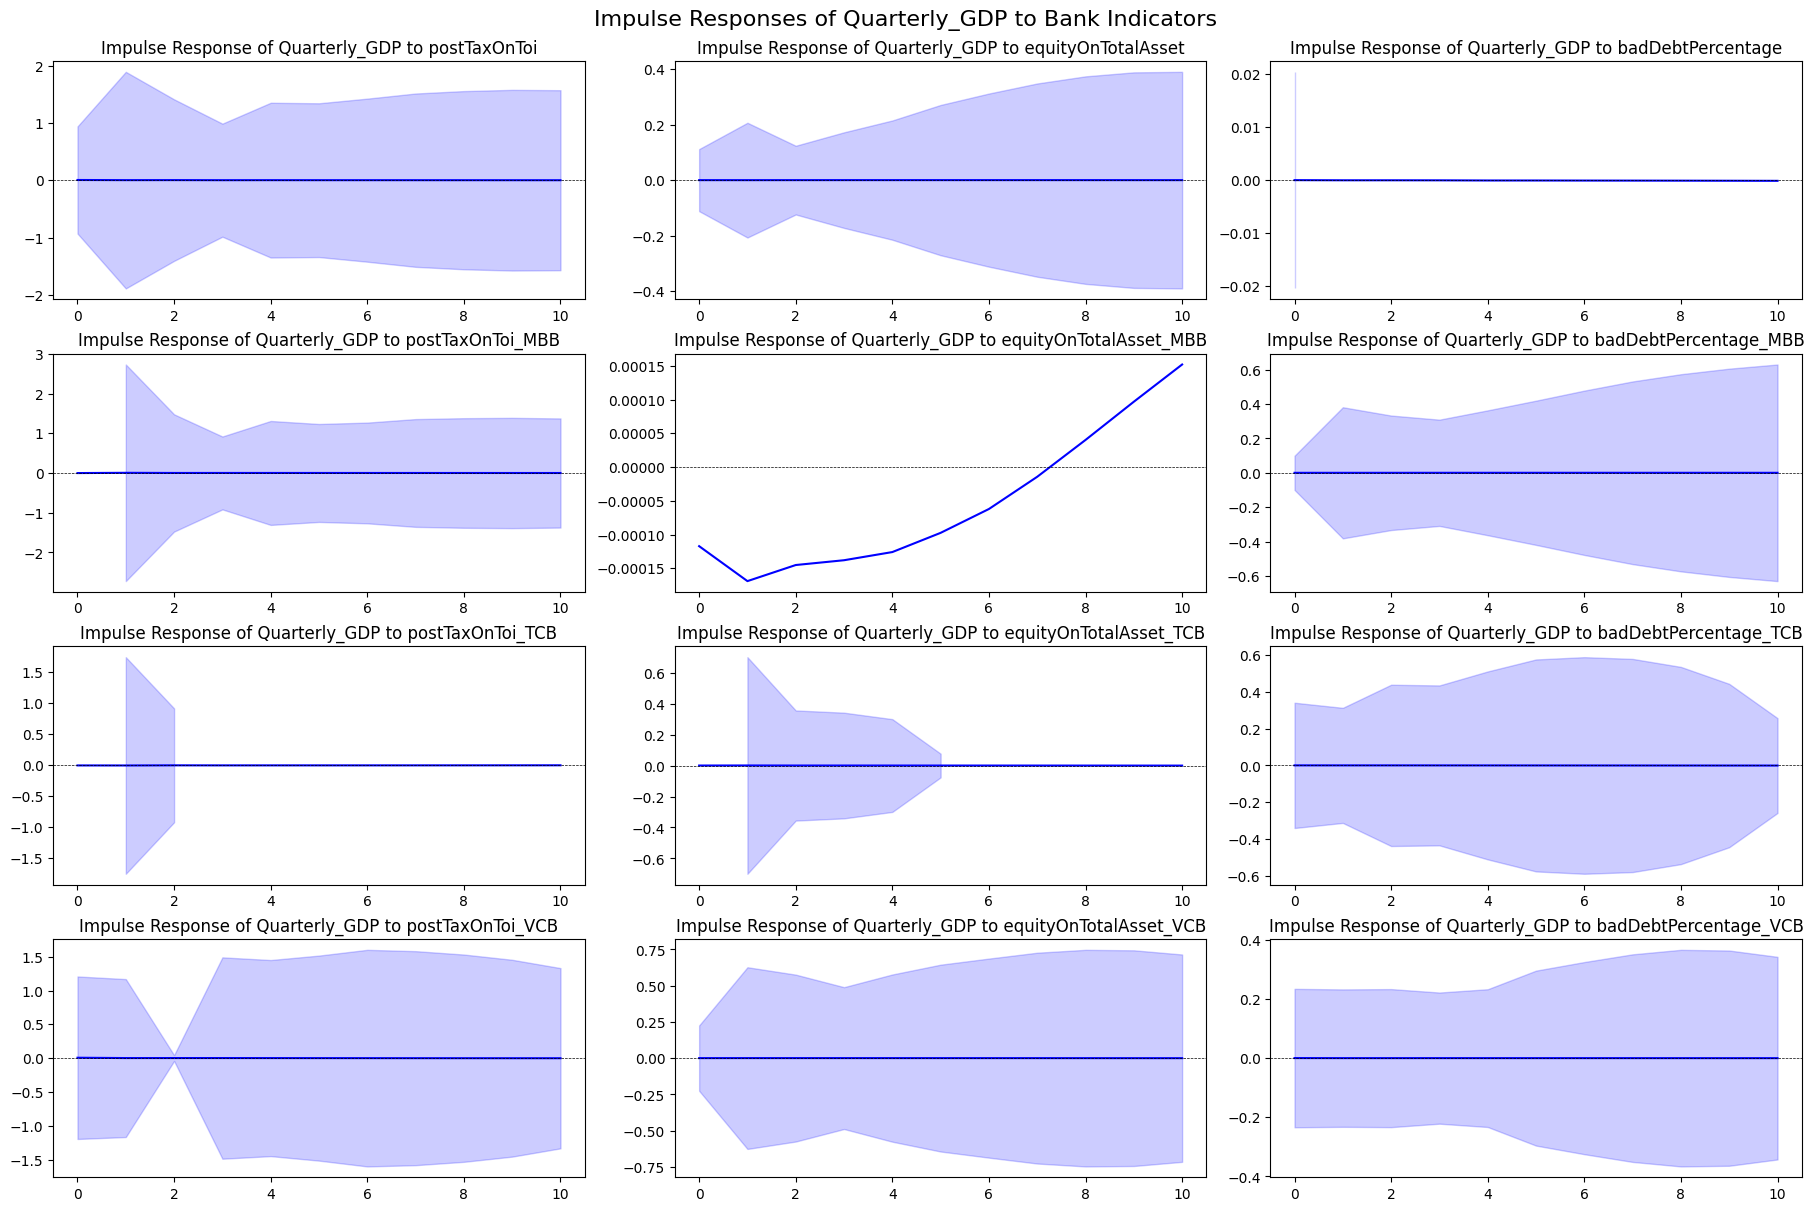

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of steps (periods) and specific variables to include
num_periods = 10
impulse_vars = [
    'postTaxOnToi', 'equityOnTotalAsset', 'badDebtPercentage',
    'postTaxOnToi_MBB', 'equityOnTotalAsset_MBB', 'badDebtPercentage_MBB',
    'postTaxOnToi_TCB', 'equityOnTotalAsset_TCB', 'badDebtPercentage_TCB',
    'postTaxOnToi_VCB', 'equityOnTotalAsset_VCB', 'badDebtPercentage_VCB'
]
response_var = 'Quarterly_GDP'

# Generate impulse response function
irf = fitted_model.irf(num_periods)

# Set up a grid of subplots
num_rows = len(impulse_vars) // 3 + (len(impulse_vars) % 3 > 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 3), constrained_layout=True)
axes = axes.flatten()

# Plot each impulse variable's effect on GDP manually on each subplot
for i, impulse in enumerate(impulse_vars):
    # Generate the impulse response data for the current variable
    irf_data = irf.orth_irfs[:, irf.model.names.index(impulse), irf.model.names.index(response_var)]
    
    # Calculate standard errors for confidence intervals
    cov_matrix = irf.cov(orth=True)  # Get the orthogonalized covariance matrix
    variances = [cov_matrix[period, irf.model.names.index(impulse), irf.model.names.index(response_var)]
                 for period in range(num_periods + 1)]
    irf_stderr = np.sqrt(variances)  # Take the square root to get standard errors

    # Plot the response with error bars (confidence intervals)
    axes[i].plot(range(num_periods + 1), irf_data, color='blue', label=f"Response of {response_var} to {impulse}")
    axes[i].fill_between(range(num_periods + 1), irf_data - irf_stderr, irf_data + irf_stderr, color='blue', alpha=0.2)
    axes[i].axhline(0, color='black', linewidth=0.5, linestyle='--')
    axes[i].set_title(f"Impulse Response of {response_var} to {impulse}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Impulse Responses of Quarterly_GDP to Bank Indicators", fontsize=16)
plt.show()




                                     SARIMAX Results                                     
Dep. Variable:                     Quarterly_GDP   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood               -1069.971
Date:                           Wed, 06 Nov 2024   AIC                           2173.943
Time:                                   14:20:04   BIC                           2216.627
Sample:                                        0   HQIC                          2191.163
                                            - 96                                         
Covariance Type:                             opg                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
postTaxOnToi           -4940.7627   1.41e+05     -0.035      0.972    -2.8e+05    2.71e+05
equityO

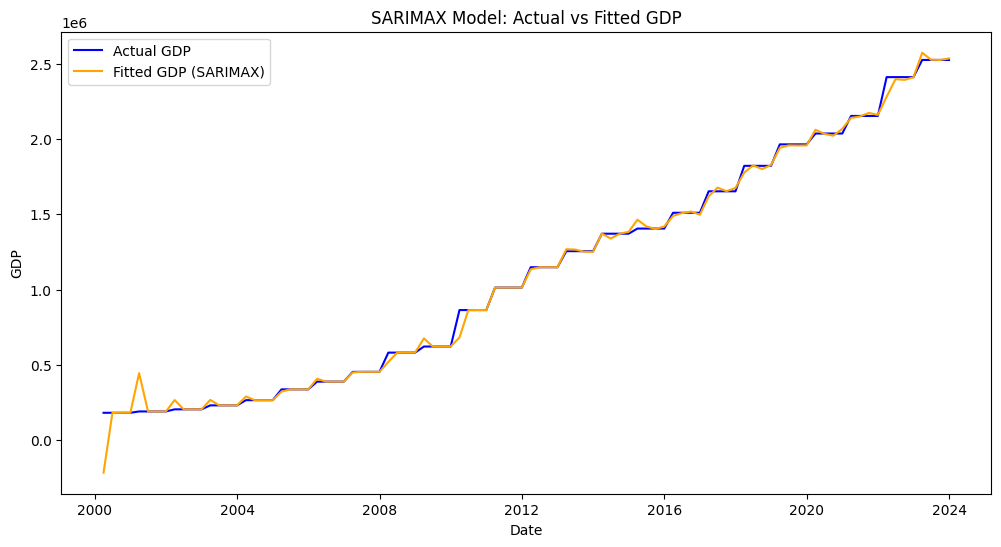

In [45]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming gdp_quarterly is the GDP data and all_data includes bank indicators
# Merge GDP with bank indicators into one DataFrame (if not done yet)
all_data = gdp_quarterly[['Date', 'Quarterly_GDP']].copy()

# Add desired indicators from each bank to the data
for bank_name, data in bank_datasets.items():
    data['Date'] = data.apply(convert_to_date, axis=1)  # Ensure Date column is present
    merged_data = pd.merge_asof(data.sort_values('Date'), gdp_quarterly, on='Date', direction='nearest')
    
    # Select only the necessary columns for correlation analysis
    all_data = pd.merge_asof(all_data, merged_data[['Date', 'postTaxOnToi', 'equityOnTotalAsset', 'badDebtPercentage']],
                             on='Date', direction='nearest', suffixes=('', f'_{bank_name}'))

# Drop rows with any missing values for a clean dataset
all_data = all_data.dropna()

# Define GDP as the target variable and other columns as exogenous variables (predictors)
endog = all_data['Quarterly_GDP']
exog = all_data.drop(columns=['Date', 'Quarterly_GDP'])

# Define SARIMAX model with seasonal order and exogenous variables
model = SARIMAX(endog, exog=exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
sarimax_results = model.fit(disp=False)

# Print summary of SARIMAX model results
print(sarimax_results.summary())

# Plot fitted values vs. actual GDP values for visual comparison
all_data['Fitted_GDP'] = sarimax_results.fittedvalues
plt.figure(figsize=(12, 6))
plt.plot(all_data['Date'], all_data['Quarterly_GDP'], label='Actual GDP', color='blue')
plt.plot(all_data['Date'], all_data['Fitted_GDP'], label='Fitted GDP (SARIMAX)', color='orange')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
plt.title('SARIMAX Model: Actual vs Fitted GDP')
plt.show()


In [ ]:
pip install xgboost


SyntaxError: invalid syntax (4172129520.py, line 1)

In [50]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.0 MB 19.7 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 29.9 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 27.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
pip install --upgrade --force-reinstall scikit-learn


  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------ --------------------------------- 2.1/12.6 MB 16.7 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.6 MB 28.8 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 29.2 MB/s eta 0:00:00
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.5.0
    Uninstalling threadpoolctl-3.5.0:
      Successfully uninstalled threadpoolctl-3

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip uninstall scikit-learn -y


Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install scikit-learn


  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import sklearn
print(sklearn.__version__)

1.5.2


In [59]:
pip install xgboost[scikit-learn]


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
pip install "xgboost[scikit-learn]"


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Load necessary libraries
import pandas as pd

# Assuming gdp_quarterly is the GDP dataset and bank_datasets contains data for each bank

# Start with GDP data
all_data = gdp_quarterly[['Date', 'Quarterly_GDP']].copy()

# Loop through each bank’s data and merge relevant indicators with the GDP data
for bank_name, data in bank_datasets.items():
    data['Date'] = pd.to_datetime(data['Date'])  # Ensure Date column is in datetime format
    merged_data = pd.merge_asof(data.sort_values('Date'), gdp_quarterly, on='Date', direction='nearest')
    
    # Keep only the necessary columns for analysis
    all_data = pd.merge_asof(all_data, merged_data[['Date', 'postTaxOnToi', 'equityOnTotalAsset', 'badDebtPercentage']],
                             on='Date', direction='nearest', suffixes=('', f'_{bank_name}'))

# Drop any rows with missing values
all_data = all_data.dropna()


Root Mean Squared Error: 200526.32698225643


f:\Python\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Figure size 1000x800 with 0 Axes>

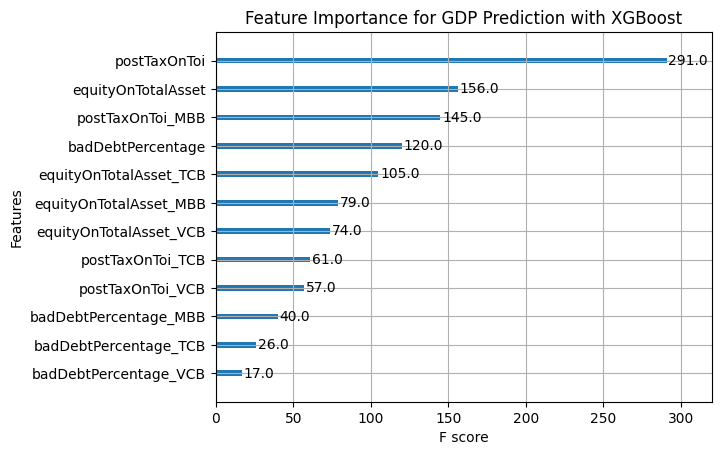

In [7]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming `all_data` is the DataFrame that combines GDP and bank indicators
# Prepare the data
X = all_data.drop(columns=['Date', 'Quarterly_GDP'])  # Features (bank indicators)
y = all_data['Quarterly_GDP']  # Target variable (GDP)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

# Plot feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(model, importance_type='weight', title="Feature Importance for GDP Prediction with XGBoost")
plt.show()


In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate predictions (if not done already)
y_pred = model.predict(X_test)

# RMSE - Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# MSE - Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# MAE - Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# MAPE - Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape}%")

# SMAPE - Symmetric Mean Absolute Percentage Error
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred))) * 100
print(f"SMAPE: {smape}%")

# SQL - Sum of Squared Logarithmic Errors
sql = np.sum((np.log1p(y_test) - np.log1p(y_pred)) ** 2)
print(f"SQL: {sql}")

# WQL - Weighted Quadratic Loss (assuming equal weights here for simplicity)
wql = np.sum((y_test - y_pred) ** 2) / len(y_test)
print(f"WQL: {wql}")

# WAPE - Weighted Absolute Percentage Error
wape = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test)) * 100
print(f"WAPE: {wape}%")

# MASE - Mean Absolute Scaled Error
# To calculate MASE, we need a naive seasonal forecast (using lagged data)
seasonal_naive_forecast = y_test.shift(1).dropna()  # Lagged forecast for scaling
mase = mae / mean_absolute_error(y_test[1:], seasonal_naive_forecast)
print(f"MASE: {mase}")

# RMSSE - Root Mean Squared Scaled Error
# Scaling factor based on seasonal naive forecast
rmsse = rmse / np.sqrt(mean_squared_error(y_test[1:], seasonal_naive_forecast))
print(f"RMSSE: {rmsse}")


RMSE: 200526.32698225643
MSE: 40210807812.99483
MAE: 157138.69690249997
MAPE: 50.593335673862136%
SMAPE: 31.848849497121773%
SQL: 5.183946301581209
WQL: 40210807812.99483
WAPE: 14.930494109591338%
MASE: 0.26960113520503826
RMSSE: 0.25235263510276995


f:\Python\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 3966937.8658894557
MAPE: 120.00431976707088%


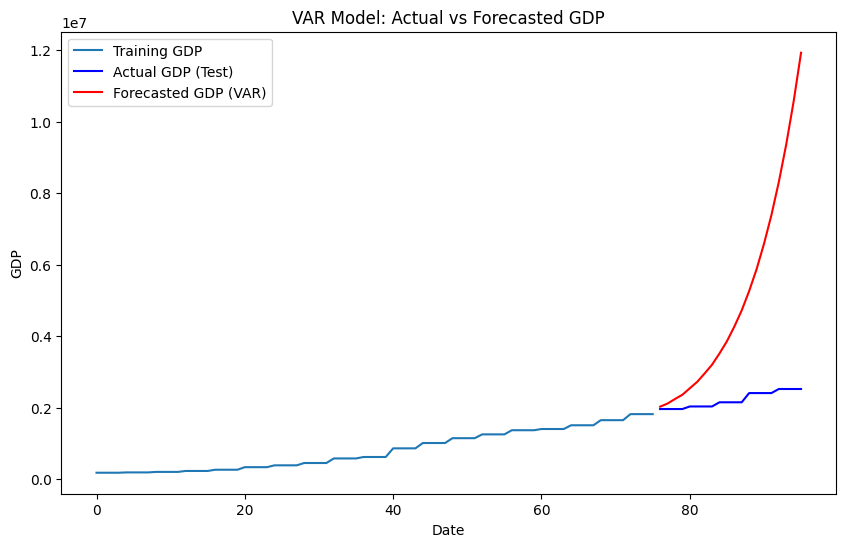

In [9]:
from statsmodels.tsa.api import VAR
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Assuming all_data is already prepared and contains both GDP and bank indicators, with Date removed
var_data = all_data.drop(columns=['Date']).astype(float)

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(var_data) * 0.8)
train_data, test_data = var_data[:train_size], var_data[train_size:]

# Fit VAR model on training data
var_model = VAR(train_data)
var_results = var_model.fit(1)  # Use optimal lag; here we assume lag of 1 for simplicity

# Forecast for the length of the test set
forecast_steps = len(test_data)
forecast = var_results.forecast(train_data.values[-var_results.k_ar:], steps=forecast_steps)

# Convert forecast to DataFrame for easy comparison with test set
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=var_data.columns)

# Evaluation on GDP predictions
y_true = test_data['Quarterly_GDP']
y_pred = forecast_df['Quarterly_GDP']

# RMSE - Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse}")

# MAPE - Mean Absolute Percentage Error
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"MAPE: {mape}%")

# Additional plot to visualize actual vs forecasted GDP values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Quarterly_GDP'], label='Training GDP')
plt.plot(test_data.index, y_true, label='Actual GDP (Test)', color='blue')
plt.plot(test_data.index, y_pred, label='Forecasted GDP (VAR)', color='red')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
plt.title('VAR Model: Actual vs Forecasted GDP')
plt.show()


f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                     
Dep. Variable:                     Quarterly_GDP   No. Observations:                   76
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -823.168
Date:                           Wed, 06 Nov 2024   AIC                           1680.335
Time:                                   15:17:30   BIC                           1718.801
Sample:                                        0   HQIC                          1695.632
                                            - 76                                         
Covariance Type:                             opg                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
postTaxOnToi           -9.737e+04   2.46e+05     -0.395      0.693    -5.8e+05    3.86e+05
equityO

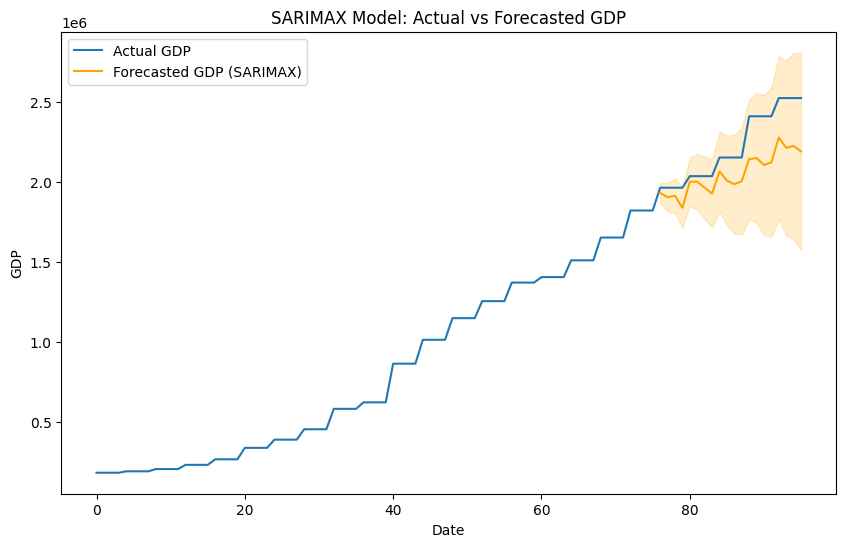

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming all_data is prepared and includes GDP and bank indicators, with Date as the index
endog = all_data['Quarterly_GDP']  # Target variable
exog = all_data.drop(columns=['Date', 'Quarterly_GDP'])  # Exogenous variables

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(endog) * 0.8)
endog_train, endog_test = endog[:train_size], endog[train_size:]
exog_train, exog_test = exog[:train_size], exog[train_size:]

# Define and fit the SARIMAX model (using seasonal order for quarterly data)
sarimax_model = SARIMAX(endog_train, exog=exog_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
sarimax_results = sarimax_model.fit(disp=False)

# Print model summary
print(sarimax_results.summary())

# Make predictions on the test set
predictions = sarimax_results.get_forecast(steps=len(endog_test), exog=exog_test)
predicted_mean = predictions.predicted_mean
pred_ci = predictions.conf_int()

# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(endog_test, predicted_mean))
mape = np.mean(np.abs((endog_test - predicted_mean) / endog_test)) * 100

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

# Plot actual vs forecasted GDP values
plt.figure(figsize=(10, 6))
plt.plot(endog.index, endog, label='Actual GDP')
plt.plot(endog_test.index, predicted_mean, label='Forecasted GDP (SARIMAX)', color='orange')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='orange', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
plt.title('SARIMAX Model: Actual vs Forecasted GDP')
plt.show()


In [11]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define ranges for p, d, q and seasonal parameters P, D, Q
p = d = q = range(0, 3)
seasonal_p = seasonal_d = seasonal_q = range(0, 2)
s = 4  # Set s based on seasonality (e.g., 4 for quarterly data)

# Generate all parameter combinations for SARIMAX
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(seasonal_p, seasonal_d, seasonal_q, [s]))

best_aic = float("inf")
best_params = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            # Fit SARIMAX model with given parameters
            model = SARIMAX(endog, exog=exog, order=param, seasonal_order=seasonal_param)
            results = model.fit(disp=False)
            
            # Track the best model by AIC score
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, seasonal_param)
                
            print(f"SARIMAX{param}x{seasonal_param} - AIC:{results.aic}")
        except:
            continue

print(f"Best SARIMAX model by AIC: SARIMAX{best_params[0]}x{best_params[1]} - AIC:{best_aic}")


SARIMAX(0, 0, 0)x(0, 0, 0, 4) - AIC:3039.9937059032777
SARIMAX(0, 0, 0)x(0, 0, 1, 4) - AIC:2660.66135040945
SARIMAX(0, 0, 0)x(0, 1, 0, 4) - AIC:2723.9799899521313
SARIMAX(0, 0, 0)x(0, 1, 1, 4) - AIC:2388.7096093148975
SARIMAX(0, 0, 0)x(1, 0, 0, 4) - AIC:2623.6397114317506
SARIMAX(0, 0, 0)x(1, 0, 1, 4) - AIC:2625.1757996928177
SARIMAX(0, 0, 0)x(1, 1, 0, 4) - AIC:2369.1327477160494
SARIMAX(0, 0, 0)x(1, 1, 1, 4) - AIC:2355.414043420359
SARIMAX(0, 0, 1)x(0, 0, 0, 4) - AIC:2645.3697858378264
SARIMAX(0, 0, 1)x(0, 0, 1, 4) - AIC:2633.9409707311343
SARIMAX(0, 0, 1)x(0, 1, 0, 4) - AIC:2368.96078214221
SARIMAX(0, 0, 1)x(0, 1, 1, 4) - AIC:2368.141076316929
SARIMAX(0, 0, 1)x(1, 0, 0, 4) - AIC:2628.6209353643735
SARIMAX(0, 0, 1)x(1, 0, 1, 4) - AIC:2630.3352361785173
SARIMAX(0, 0, 1)x(1, 1, 0, 4) - AIC:2366.24750771714
SARIMAX(0, 0, 1)x(1, 1, 1, 4) - AIC:2360.140111289731
SARIMAX(0, 0, 2)x(0, 0, 0, 4) - AIC:2618.341334596883
SARIMAX(0, 0, 2)x(0, 0, 1, 4) - AIC:2615.273999321231
SARIMAX(0, 0, 2)x(0, 

f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 2, 2)x(0, 1, 0, 4) - AIC:2184.325477693437
SARIMAX(0, 2, 2)x(0, 1, 1, 4) - AIC:2175.3691454847294


f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(0, 2, 2)x(1, 0, 0, 4) - AIC:2336.5666841896
SARIMAX(0, 2, 2)x(1, 0, 1, 4) - AIC:2334.3181718697438
SARIMAX(0, 2, 2)x(1, 1, 0, 4) - AIC:2178.9940345907803
SARIMAX(0, 2, 2)x(1, 1, 1, 4) - AIC:2174.46471550376
SARIMAX(1, 0, 0)x(0, 0, 0, 4) - AIC:2544.052252402815
SARIMAX(1, 0, 0)x(0, 0, 1, 4) - AIC:2545.1098869688312
SARIMAX(1, 0, 0)x(0, 1, 0, 4) - AIC:2327.5623458561213
SARIMAX(1, 0, 0)x(0, 1, 1, 4) - AIC:2316.1073048636213
SARIMAX(1, 0, 0)x(1, 0, 0, 4) - AIC:2544.7589783510675
SARIMAX(1, 0, 0)x(1, 0, 1, 4) - AIC:2543.514690841086
SARIMAX(1, 0, 0)x(1, 1, 0, 4) - AIC:2321.634561780165
SARIMAX(1, 0, 0)x(1, 1, 1, 4) - AIC:2317.597816473399
SARIMAX(1, 0, 1)x(0, 0, 0, 4) - AIC:2540.284074458025
SARIMAX(1, 0, 1)x(0, 0, 1, 4) - AIC:2542.0420238817987
SARIMAX(1, 0, 1)x(0, 1, 0, 4) - AIC:2312.8661538474485
SARIMAX(1, 0, 1)x(0, 1, 1, 4) - AIC:2297.146192469185
SARIMAX(1, 0, 1)x(1, 0, 0, 4) - AIC:2541.927018533437
SARIMAX(1, 0, 1)x(1, 0, 1, 4) - AIC:2540.715232398179
SARIMAX(1, 0, 1)x(1, 1,

f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(1, 2, 1)x(0, 1, 0, 4) - AIC:2184.940254495301
SARIMAX(1, 2, 1)x(0, 1, 1, 4) - AIC:2176.1868076534547


f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(1, 2, 1)x(1, 0, 0, 4) - AIC:2341.450223399498
SARIMAX(1, 2, 1)x(1, 0, 1, 4) - AIC:2335.27160627382
SARIMAX(1, 2, 1)x(1, 1, 0, 4) - AIC:2179.7495746014774
SARIMAX(1, 2, 1)x(1, 1, 1, 4) - AIC:2175.304105438221


f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(1, 2, 2)x(0, 0, 0, 4) - AIC:2345.786262210491
SARIMAX(1, 2, 2)x(0, 0, 1, 4) - AIC:2340.1312264941566
SARIMAX(1, 2, 2)x(0, 1, 0, 4) - AIC:2183.314630477592
SARIMAX(1, 2, 2)x(0, 1, 1, 4) - AIC:2175.6210233588313
SARIMAX(1, 2, 2)x(1, 0, 0, 4) - AIC:2336.679044912071


f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(1, 2, 2)x(1, 0, 1, 4) - AIC:2334.9295404038835
SARIMAX(1, 2, 2)x(1, 1, 0, 4) - AIC:2179.821945804398
SARIMAX(1, 2, 2)x(1, 1, 1, 4) - AIC:2174.521340751595
SARIMAX(2, 0, 0)x(0, 0, 0, 4) - AIC:2539.450504987026
SARIMAX(2, 0, 0)x(0, 0, 1, 4) - AIC:2541.092105236448
SARIMAX(2, 0, 0)x(0, 1, 0, 4) - AIC:2314.251152564365
SARIMAX(2, 0, 0)x(0, 1, 1, 4) - AIC:2297.0739492646712
SARIMAX(2, 0, 0)x(1, 0, 0, 4) - AIC:2540.9050619479367
SARIMAX(2, 0, 0)x(1, 0, 1, 4) - AIC:2538.8688211972653
SARIMAX(2, 0, 0)x(1, 1, 0, 4) - AIC:2302.136195785532
SARIMAX(2, 0, 0)x(1, 1, 1, 4) - AIC:2299.06159803964
SARIMAX(2, 0, 1)x(0, 0, 0, 4) - AIC:2541.2741443325467
SARIMAX(2, 0, 1)x(0, 0, 1, 4) - AIC:2542.7575446131204
SARIMAX(2, 0, 1)x(0, 1, 0, 4) - AIC:2314.9061269483914
SARIMAX(2, 0, 1)x(0, 1, 1, 4) - AIC:2297.466794057325
SARIMAX(2, 0, 1)x(1, 0, 0, 4) - AIC:2542.474045491522
SARIMAX(2, 0, 1)x(1, 0, 1, 4) - AIC:2540.0184036066676
SARIMAX(2, 0, 1)x(1, 1, 0, 4) - AIC:2301.623373813857
SARIMAX(2, 0, 1)x(1, 

f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(2, 1, 1)x(0, 0, 1, 4) - AIC:2350.041573277347
SARIMAX(2, 1, 1)x(0, 1, 0, 4) - AIC:2189.1398541491253
SARIMAX(2, 1, 1)x(0, 1, 1, 4) - AIC:2179.6085623727226


f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(2, 1, 1)x(1, 0, 0, 4) - AIC:2339.1408564370727


f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(2, 1, 1)x(1, 0, 1, 4) - AIC:2332.7860404070143
SARIMAX(2, 1, 1)x(1, 1, 0, 4) - AIC:2183.8710599978417
SARIMAX(2, 1, 1)x(1, 1, 1, 4) - AIC:2175.928685306587
SARIMAX(2, 1, 2)x(0, 0, 0, 4) - AIC:2351.3080905074603
SARIMAX(2, 1, 2)x(0, 0, 1, 4) - AIC:2342.0975852742217
SARIMAX(2, 1, 2)x(0, 1, 0, 4) - AIC:2187.716646808884


f:\Python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 1, 2)x(0, 1, 1, 4) - AIC:2180.213683739672
SARIMAX(2, 1, 2)x(1, 0, 0, 4) - AIC:2340.752073710591


f:\Python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 1, 2)x(1, 0, 1, 4) - AIC:2333.7002941846667
SARIMAX(2, 1, 2)x(1, 1, 0, 4) - AIC:2184.8649756835284
SARIMAX(2, 1, 2)x(1, 1, 1, 4) - AIC:2179.1669129522675
SARIMAX(2, 2, 0)x(0, 0, 0, 4) - AIC:2364.852997804597
SARIMAX(2, 2, 0)x(0, 0, 1, 4) - AIC:2351.2834833506854
SARIMAX(2, 2, 0)x(0, 1, 0, 4) - AIC:2209.1803159107935
SARIMAX(2, 2, 0)x(0, 1, 1, 4) - AIC:2191.3195581173322
SARIMAX(2, 2, 0)x(1, 0, 0, 4) - AIC:2344.995261872683
SARIMAX(2, 2, 0)x(1, 0, 1, 4) - AIC:2343.3995360073363
SARIMAX(2, 2, 0)x(1, 1, 0, 4) - AIC:2198.720192968623
SARIMAX(2, 2, 0)x(1, 1, 1, 4) - AIC:2188.3676418710425


f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(2, 2, 1)x(0, 0, 0, 4) - AIC:2349.6833283921715
SARIMAX(2, 2, 1)x(0, 0, 1, 4) - AIC:2343.3047907106084


f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(2, 2, 1)x(0, 1, 0, 4) - AIC:2209.53705379773
SARIMAX(2, 2, 1)x(0, 1, 1, 4) - AIC:2175.486239113619


f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(2, 2, 1)x(1, 0, 0, 4) - AIC:2339.6734499873915
SARIMAX(2, 2, 1)x(1, 0, 1, 4) - AIC:2333.9861373933086


f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX(2, 2, 1)x(1, 1, 0, 4) - AIC:2179.3245985761887
SARIMAX(2, 2, 1)x(1, 1, 1, 4) - AIC:2174.3947382762744
SARIMAX(2, 2, 2)x(0, 0, 0, 4) - AIC:2340.6171488954524
SARIMAX(2, 2, 2)x(0, 0, 1, 4) - AIC:2338.7131938458856
SARIMAX(2, 2, 2)x(0, 1, 0, 4) - AIC:2184.194225825105
SARIMAX(2, 2, 2)x(0, 1, 1, 4) - AIC:2177.6904436719947
SARIMAX(2, 2, 2)x(1, 0, 0, 4) - AIC:2336.5146135414916
SARIMAX(2, 2, 2)x(1, 0, 1, 4) - AIC:2334.355315472905
SARIMAX(2, 2, 2)x(1, 1, 0, 4) - AIC:2180.721693027292
SARIMAX(2, 2, 2)x(1, 1, 1, 4) - AIC:2175.9027850360108
Best SARIMAX model by AIC: SARIMAX(0, 1, 0)x(1, 1, 1, 4) - AIC:2163.8699894251263


Optimized RMSE: 199065.01546408754
Optimized MAPE: 7.236747198382323%


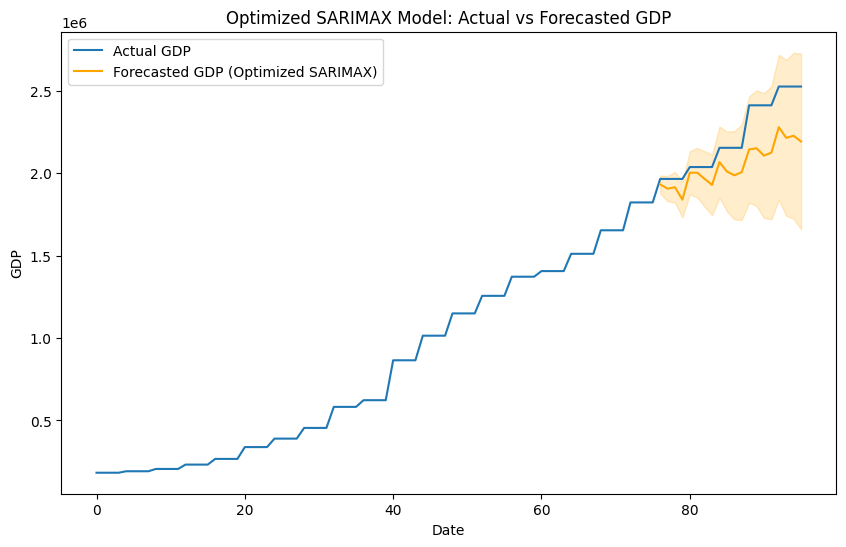

In [12]:
# Refit SARIMAX model with best parameters on the entire training data
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from sklearn.metrics import mean_squared_error

# Fit the best SARIMAX model based on the optimal parameters
best_sarimax_model = SARIMAX(endog_train, exog=exog_train, order=(0, 1, 0), seasonal_order=(1, 1, 1, 4))
best_sarimax_results = best_sarimax_model.fit(disp=False)

# Make predictions on the test set
predictions = best_sarimax_results.get_forecast(steps=len(endog_test), exog=exog_test)
predicted_mean = predictions.predicted_mean
pred_ci = predictions.conf_int()

# Calculate RMSE and MAPE on test set
rmse = np.sqrt(mean_squared_error(endog_test, predicted_mean))
mape = np.mean(np.abs((endog_test - predicted_mean) / endog_test)) * 100

print(f"Optimized RMSE: {rmse}")
print(f"Optimized MAPE: {mape}%")

# Plot actual vs forecasted GDP values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(endog.index, endog, label='Actual GDP')
plt.plot(endog_test.index, predicted_mean, label='Forecasted GDP (Optimized SARIMAX)', color='orange')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='orange', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
plt.title('Optimized SARIMAX Model: Actual vs Forecasted GDP')
plt.show()


In [13]:
# Assume best_params holds the optimal (p, d, q) and (P, D, Q, s) from grid search
best_pdq, best_seasonal_pdq = best_params

# Refit the SARIMAX model with the best parameters
best_model = SARIMAX(endog, exog=exog, order=best_pdq, seasonal_order=best_seasonal_pdq)
best_results = best_model.fit(disp=False)

# Evaluate the final model
predictions = best_results.get_forecast(steps=len(endog_test), exog=exog_test)
predicted_mean = predictions.predicted_mean
rmse = np.sqrt(mean_squared_error(endog_test, predicted_mean))
mape = np.mean(np.abs((endog_test - predicted_mean) / endog_test)) * 100

print(f"Optimized RMSE: {rmse}")
print(f"Optimized MAPE: {mape}%")


Optimized RMSE: 705776.5495431268
Optimized MAPE: nan%
